# Import library

# Data Preprocessing

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
%matplotlib inline

import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)


# 배경색 흰색으로 맞춰줌
import matplotlib as mpl
mpl.rc('figure', facecolor = 'w', edgecolor ='w')

In [5]:
# Data Load
demo = pd.read_csv('../data/LPOINT_BIG_COMP_01_DEMO.csv', low_memory=False)
pdde = pd.read_csv('../data/LPOINT_BIG_COMP_02_PDDE.csv', low_memory=False)
cop = pd.read_csv('../data/LPOINT_BIG_COMP_03_COP_U.csv', low_memory=False)
clac = pd.read_csv('../data/LPOINT_BIG_COMP_04_PD_CLAC.csv', low_memory=False)
br = pd.read_csv('../data/LPOINT_BIG_COMP_05_BR.csv', low_memory=False)
lpay = pd.read_csv('../data/LPOINT_BIG_COMP_06_LPAY.csv', low_memory=False)

# Column명 변경
demo.columns = ['고객번호', '성별', '연령대', '거주지대분류코드']
pdde.columns = ['고객번호', '영수증번호', '채널구분', '제휴사', '점포코드', '상품코드', '구매일자', '구매시간', '구매금액', '구매수량']
cop.columns = ['고객번호', '영수증번호', '제휴사', '점포코드', '채널구분', '이용일자', '방문일자', '이용시간', '이용금액']
clac.columns = ['상품코드', '소분류명', '대분류명', '중분류명']
br.columns = ['점포코드', '제휴사', '점포대분류코드', '점포중분류코드']
lpay.columns = ['고객번호', '영수증번호', '제휴사', '채널구분', '이용일자', '이용시간', '이용금액']

### [1. demo]: Demo

In [6]:
# demo.head(3)

In [7]:
# # 데이터 타입 확인
# demo.info()

In [8]:
# # 결측치 확인
# demo.isna().sum()

In [9]:
# # 데이터 갯수 확인
# demo.nunique()

In [10]:
# # 성별
# plt.figure(figsize = (7, 4))
# sns.countplot(x='성별', data=demo)
# plt.show()

In [11]:
# # 연령대
# plt.figure(figsize = (7, 4))
# sns.countplot(x='연령대', data=demo)
# plt.show()

In [12]:
# # 거주지대분류코드
# plt.figure(figsize = (7, 4))
# sns.countplot(x='거주지대분류코드', data=demo)
# plt.show()

### [2. pdde]: 상품 구매 정보

In [13]:
# pdde.head(3)

In [14]:
# 중복되는 행 제거 -> 데이터 추출시 고객, 상품 각각 추출하여 중복이 발생한 것으로 판단함
pdde.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [15]:
# # 데이터 타입 확인
# pdde.info()

In [16]:
# # 결측치 확인
# pdde.isna().sum()

In [17]:
# # 상품 구매 정보 테이블 내에 점포 코드 결측치는 온라인으로 주문한 것을 확인할 수 있음. 온라인으로 주문한 뒤에 택배로 수령
# pdde[pdde['점포코드'].isna()]['채널구분'].unique()

In [18]:
# 결측치 치환 -> na값을 온라인으로 채워줌
pdde['점포코드'] = pdde['점포코드'].fillna('온라인')

In [19]:
# # 데이터 갯수 확인
# pdde.nunique()

In [20]:
# # 채널구분
# plt.figure(figsize = (7, 4))
# sns.countplot(x='채널구분', data=pdde)
# plt.show()

In [21]:
# # 제휴사
# plt.figure(figsize = (7, 4))
# sns.countplot(x='제휴사', data=pdde)
# plt.show()

In [22]:
# # 구매시간
# plt.figure(figsize = (7, 4))
# sns.countplot(x='구매시간', data=pdde)
# plt.show()

### [3. cop]: 제휴사 이용 정보

In [23]:
# cop.head(3)

In [24]:
# # 데이터 타입 확인
# cop.info()

In [25]:
# # 결측치 확인
# cop.isna().sum()

In [26]:
# # 제휴사 이용 정보 테이블 내에 점포 코드 결측치는 온라인으로 주문한 것을 확인할 수 있음. 온라인으로 주문한 뒤에 택배로 수령
# cop[cop['점포코드'].isna()]['채널구분'].unique()

In [24]:
# 결측치 치환
cop['점포코드'] = cop['점포코드'].fillna('온라인')

In [27]:
# # 데이터 갯수 확인
# cop.nunique()

In [28]:
# # 채널구분
# plt.figure(figsize = (7, 4))
# sns.countplot(x='채널구분', data=cop)
# plt.show()

In [29]:
# # 제휴사
# plt.figure(figsize = (7, 4))
# sns.countplot(x='제휴사', data=cop)
# plt.show()

In [30]:
# # 이용시간
# plt.figure(figsize = (7, 4))
# sns.countplot(x='이용시간', data=cop)
# plt.show()

### [4. clac]: 상품 분류 정보

In [31]:
# clac.head(3)

In [32]:
# # 데이터 타입 확인
# clac.info()

In [33]:
# # 결측치 확인
# clac.isna().sum()

In [34]:
# # 데이터 갯수 확인
# clac.nunique()

### [5. br]: 점포 정보

In [35]:
# br.head(3)

In [36]:
# # 데이터 타입 확인
# br.info()

In [37]:
# # 결측치 확인
# br.isna().sum()

In [38]:
# # 데이터 갯수 확인
# br.nunique()

In [39]:
# # 제휴사
# plt.figure(figsize = (7, 4))
# sns.countplot(x='제휴사', data=br)
# plt.show()

In [40]:
# # 점포대분류코드
# plt.figure(figsize = (7, 4))
# sns.countplot(x='점포대분류코드', data=br)
# plt.show()

### [6. lpay]: 엘페이 이용

In [41]:
# lpay.head(3)

In [42]:
# # 데이터 타입 확인
# lpay.info()

In [43]:
# # 결측치 확인
# lpay.isna().sum()

In [44]:
# # 데이터 갯수 확인
# lpay.nunique()

In [45]:
# # 제휴사
# plt.figure(figsize = (7, 4))
# sns.countplot(x='제휴사', data=lpay)
# plt.show()

In [46]:
# # 채널구분
# plt.figure(figsize = (7, 4))
# sns.countplot(x='채널구분', data=lpay)
# plt.show()

In [47]:
# # 이용시간
# plt.figure(figsize = (7, 4))
# sns.countplot(x='이용시간', data=lpay)
# plt.show()

# Data Merge

In [49]:
# # 데이터 크기 확인
# print('pdde :',pdde.shape)
# print('copu :',cop.shape)
# print('lpay :',lpay.shape)

In [50]:
# # 칼럼별 상관관계 확인
# # 제휴사 테이블 중에서 방문일자와 이용일자는 상관관계가 상당히 높게 나타남을 확인
# # 제휴사 테이블 내 방문일자 제거
# plt.figure(figsize=(15,15))
# sns.heatmap(data = cop.corr(), annot=True,fmt = '.2f', linewidths=.5, cmap='Blues')

In [51]:
# 데이터를 통합하기 위하여 칼럼 통합
pdde['타입'] = 'Product'
cop['타입'] = 'Affiliate'
lpay['타입'] = 'Lpay'
pdde['방문일자'] = 0
lpay['방문일자'] = 0
cop['구매수량'] = 0
cop['상품코드'] = np.nan
lpay['점포코드'] = np.nan
lpay['상품코드'] = np.nan
lpay['구매수량'] = 0

In [52]:
# 칼럼명을 새롭게 동일하게 통일
cop.columns = ['고객번호', '영수증번호', '제휴사', '점포코드', '채널구분', '구매일자', '방문일자', '구매시간', '구매금액', '타입', '구매수량', '상품코드']
lpay.columns = ['고객번호', '영수증번호', '제휴사', '채널구분', '구매일자', '구매시간', '구매금액', '타입', '방문일자', '점포코드', '상품코드', '구매수량']

# 상품구매데이터를 기준으로 하여 열을 통일
cop = cop[['고객번호', '영수증번호', '채널구분', '제휴사', '점포코드', '상품코드', '구매일자', '방문일자', '구매시간', '구매금액', '구매수량', '타입']]
lpay = lpay[['고객번호', '영수증번호', '채널구분', '제휴사', '점포코드', '상품코드', '구매일자', '방문일자', '구매시간', '구매금액', '구매수량', '타입']]

# 데이터 타입 변경
lpay['영수증번호'] = lpay['영수증번호'].astype('object')
lpay['점포코드'] = lpay['점포코드'].astype('object')
cop['상품코드'] = cop['상품코드'].astype('object')
lpay['상품코드'] = lpay['상품코드'].astype('object')
pdde['구매금액'] = pdde['구매금액'].astype('int')
pdde['방문일자'] = pdde['방문일자'].astype('int64')
lpay['방문일자'] = lpay['방문일자'].astype('int64')

In [53]:
# 데이터 concat
df = pd.concat([pdde,cop,lpay])
# 고객 정보 테이븛 통합
df = pd.merge(df, demo, on = ['고객번호'], how = 'left')
# 상품 분류 테이블 통합
df = pd.merge(df, br, on = ['점포코드','제휴사'], how = 'left')
# 점포 정보 테이블 통합
df = pd.merge(df, clac, on = ['상품코드'], how = 'left')

In [54]:
# 결측치 확인
df.isnull().sum()

고객번호             0
영수증번호            0
채널구분             0
제휴사              0
점포코드        353239
상품코드        601488
구매일자             0
구매시간             0
구매금액             0
구매수량             0
타입               0
방문일자             0
성별               0
연령대              0
거주지대분류코드         0
점포대분류코드     729023
점포중분류코드     729023
소분류명        601488
대분류명        601488
중분류명        601488
dtype: int64

In [52]:
# print('<엘페이>')
# print(lpay.isnull().sum())
# print('<제휴사>')
# print(cop.isnull().sum())
# print('<상품구매>')
# print(pdde.isnull().sum())

In [53]:
# data = df.copy()

In [54]:
# # 데이터 분리
# df1 = data[data['타입']== 'Product']
# df2 = data[data['타입']== 'Affiliate']
# df3 = data[data['타입']== 'Lpay']

In [55]:
df['날짜'] = df['구매일자'].astype(str)
df['날짜'] = pd.to_datetime(df['날짜'])
# df['날짜'] = df['날짜'].dt.tz_localize('UTC')

In [56]:
df = df.sort_values(by=['날짜'], ascending=[True])
df['diff'] = df.groupby('고객번호')['날짜'].diff().fillna('0').astype(str)
df['diff'] = df['diff'].apply(lambda x: int(x.split()[0]))

In [57]:
df['diff'].nunique()

321

In [63]:
imp = df.groupby('고객번호')[['영수증번호']].count().reset_index()

# 구매를 가장 많이한 고객의 고객번호
# imp[imp['영수증번호']==13636]

In [197]:
# # 구매횟수별로 정렬
# imp.sort_values(by=['영수증번호'], ascending=[False])

In [66]:
imp['영수증번호'].describe()

count    29874.000000
mean       158.863125
std        226.480154
min          1.000000
25%         20.000000
50%         83.000000
75%        211.000000
max      13120.000000
Name: 영수증번호, dtype: float64

### 3사분위 수 이상 구매한 고객 EDA

- 연령대 -> 별다른 특이점 찾지 못함

In [78]:
demo_high = demo.loc[demo['고객번호'].isin(imp[imp['영수증번호'] >= 211]['고객번호'].tolist())]

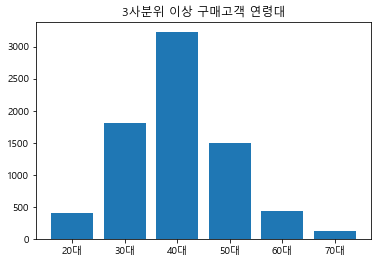

In [79]:
# 3사분위수 이상 구매를 한 고객의 연령대
plt.bar(demo_high.groupby('연령대').count()['고객번호'].reset_index()['연령대'], demo_high.groupby('연령대').count()['고객번호'].reset_index()['고객번호'])
plt.title('3사분위 이상 구매고객 연령대')
plt.show()

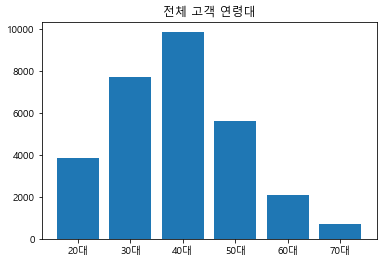

In [81]:
# 전체 고객의 연령대
plt.bar(demo.groupby('연령대').count()['고객번호'].reset_index()['연령대'], demo.groupby('연령대').count()['고객번호'].reset_index()['고객번호'])
plt.title('전체 고객 연령대')
plt.show()

- 성별 -> 별다른 특이점 찾지 못함

In [96]:
demo_high.groupby('성별').count()['고객번호'] / demo_high.groupby('성별').count()['고객번호'].sum()

성별
남성    0.279318
여성    0.720682
Name: 고객번호, dtype: float64

In [97]:
demo.groupby('성별').count()['고객번호'] / demo.groupby('성별').count()['고객번호'].sum()

성별
남성    0.32862
여성    0.67138
Name: 고객번호, dtype: float64

- 거주지 -> 의미없음

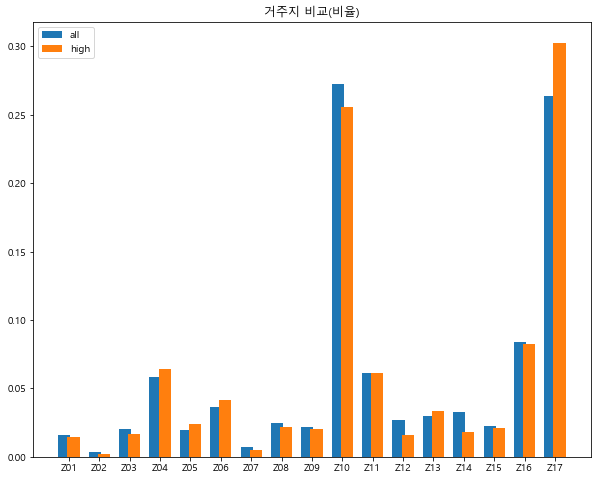

In [132]:
x = np.arange(len(demo.groupby('거주지대분류코드').count()))

plt.figure(figsize=(10, 8))
plt.bar(x-0.15, demo.groupby('거주지대분류코드').count().reset_index()['고객번호'] / demo.groupby('거주지대분류코드').count().reset_index()['고객번호'].sum(),0.4, label='all') 
plt.bar(x+0.15, demo_high.groupby('거주지대분류코드').count().reset_index()['고객번호'] / demo_high.groupby('거주지대분류코드').count().reset_index()['고객번호'].sum(),0.4, label='high') 
plt.xticks(x, demo.groupby('거주지대분류코드').count().reset_index()['거주지대분류코드'])
plt.legend()
plt.title('거주지 비교(비율)')
plt.show()

- *df에서 특이점을 찾아보자*

In [134]:
df_high = df.loc[df['고객번호'].isin(imp[imp['영수증번호'] >= 211]['고객번호'].tolist())]

- 주 구매 채널이 어떻게 되는지 판단

    - 전체가 나열된 데이터에서 보았을때, 두 데이터 모두 오프라인에서 구매를 한 비율이 압도적임

In [159]:
# 과금러들
df_high.groupby('채널구분').count()['고객번호'] / df_high.groupby('채널구분').count()['고객번호'].sum()

채널구분
1    0.860507
2    0.139493
Name: 고객번호, dtype: float64

In [140]:
# 전체 고객
df.groupby('채널구분').count()['고객번호'] / df.groupby('채널구분').count()['고객번호'].sum()

채널구분
1    0.87068
2    0.12932
Name: 고객번호, dtype: float64

    - 주로 구매하는 채널이 어디인지를 판단해봄 (groupby와 max를 통해)

*드디어 나름 의미있는 결과가 나타남 -> 과금러들의 주구매 채널은 온라인인 것을 확인할 수 있음*

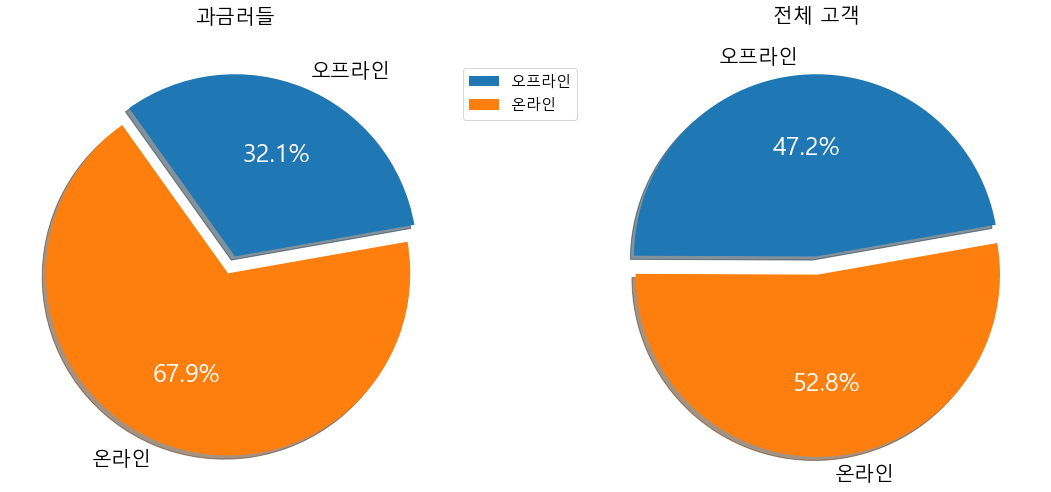

In [196]:
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
patches_high, texts_high, autotexts_high = plt.pie(
    df_high.groupby('고객번호')['채널구분'].max().reset_index().groupby('채널구분').count().reset_index()['고객번호'],
    labels = ['오프라인', '온라인'],
    labeldistance=1.1,## label이 파이로부터 얼마나 떨어지는가, 1일경우 딱 붙어있음. 
    explode=[0, 0.1], ##pie가 튀어나오는지 정해줌  
    startangle=10,## 어디에서 시작할지, 정해줌  
    shadow=True, ##그림자 
    autopct='%1.1f%%', ## pi 위에 표시될 글자 형태, 또한 알아서 %로 변환해서 알려줌 
)
plt.title('과금러들', size = 20)
plt.legend(loc = (1, 0.8), fontsize=15)

plt.subplot(2, 2, 2)
patches, texts, autotexts = plt.pie(
    df.groupby('고객번호')['채널구분'].max().reset_index().groupby('채널구분').count().reset_index()['고객번호'],
    labels = ['오프라인', '온라인'],
    labeldistance=1.1,## label이 파이로부터 얼마나 떨어지는가, 1일경우 딱 붙어있음. 
    explode=[0, 0.1], ##pie가 튀어나오는지 정해줌  
    startangle=10,## 어디에서 시작할지, 정해줌  
    shadow=True, ##그림자 
    autopct='%1.1f%%', ## pi 위에 표시될 글자 형태, 또한 알아서 %로 변환해서 알려줌 
)
plt.title('전체 고객', size = 20)

for t in autotexts_high:
    t.set_color("white")
    t.set_fontsize(25)

for t in texts_high:
    t.set_fontsize(20)

for t in autotexts:
    t.set_color("white")
    t.set_fontsize(25)
    
for t in texts:
    t.set_fontsize(20)    

plt.tight_layout()
plt.show()

- ing~

In [203]:
df_high.groupby('고객번호')['구매금액'].mean().describe()

count    7.504000e+03
mean     2.469288e+04
std      6.354409e+04
min      1.284488e+03
25%      6.779114e+03
50%      1.072608e+04
75%      2.125653e+04
max      2.413200e+06
Name: 구매금액, dtype: float64

## END